In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path, size=50).get_name()
print(font_name)
plt.rc('font', family=font_name)

# font setting
font_title = {'family': 'NanumBarunGothic', 'size': 18, 'color': 'black'}
font_label = {'family': 'NanumBarunGothic', 'size': 12, 'color': 'black'}

plt.rcParams['font.size']=14
print (plt.rcParams['font.size'] )

NanumBarunGothic
14.0


In [13]:
# savePath = 'mAP-result-log-1218-21.csv'
savePath = 'mAP-result-log-1218.csv'
res_df = pd.read_csv(savePath)

In [14]:
res_df.groupby('model').count()

,timestamp,ref,val,similarity,shot,train-data,memo,acc,mAP,IOU,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
model,,,,,,,,,,,,,,,,,,,,,
heatmap-3chan-1219.pth,120,120,120,120,120,120,120,120,120,120,...,0,0,0,0,0,0,0,0,0,0
heatmap-6chan-1216-1cls.pth,120,120,120,120,120,120,120,120,120,120,...,0,0,0,0,0,0,0,0,0,0
heatmap-6chan-1216-2cls.pth,120,120,120,120,120,120,120,120,120,120,...,0,0,0,0,0,0,0,0,0,0
heatmap-6chan-1216-fine.pth,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
heatmap-6chan-1216.pth,120,120,120,120,120,120,120,120,120,120,...,0,0,0,0,0,0,0,0,0,0
heatmap-6chan-1218-21.pth,120,120,120,120,120,120,120,120,120,120,...,0,0,0,0,0,0,0,0,0,0
heatmap-6chan-1219-fine.pth,60,60,60,60,60,60,60,60,60,60,...,0,0,0,0,0,0,0,0,0,0
heatmap-7chan-1217.pth,120,120,120,120,120,120,120,120,120,120,...,0,0,0,0,0,0,0,0,0,0
heatmap-9chan-1219.pth,120,120,120,120,120,120,120,120,120,120,...,0,0,0,0,0,0,0,0,0,0


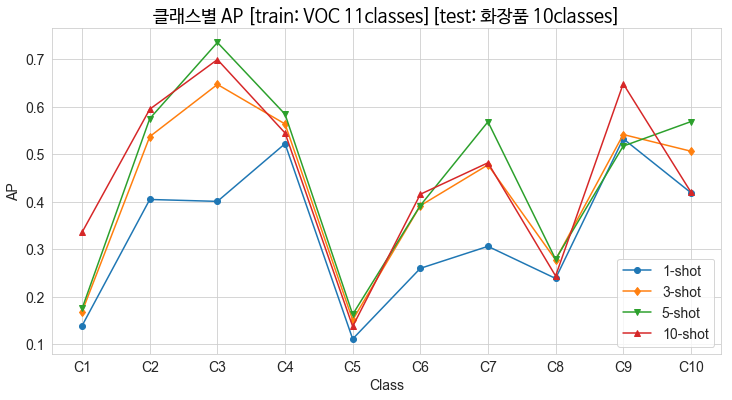

In [25]:
sns.set_style("whitegrid")
font_title = {'family': 'NanumBarunGothic', 'size': 18, 'color': 'black'}

data = res_df[res_df['model']=="heatmap-6chan-1216.pth"]
data1 = data[data['shot']==1]
data5 = data[data['shot']==5]
data10 = data[data['shot']==10]
data3 = data[data['shot']==3]

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(data1.iloc[:,11:].mean(), marker='o', label='1-shot')
plt.plot(data3.iloc[:,11:].mean(), marker='d', label='3-shot')
plt.plot(data5.iloc[:,11:].mean(), marker='v', label='5-shot')
plt.plot(data10.iloc[:,11:].mean(), marker='^', label='10-shot')
plt.legend()
# plt.xticks([-1,0,1,2,3,4,5,6,7,8,9,10])
group_labels = (["C"+str(i) for i in range(1,11)])
ax.set_xticklabels(group_labels)
plt.xlabel('Class')
plt.ylabel('AP')
plt.title('클래스별 AP [train: VOC 11classes][test: 화장품 10classes]', fontdict=font_title)
plt.show()

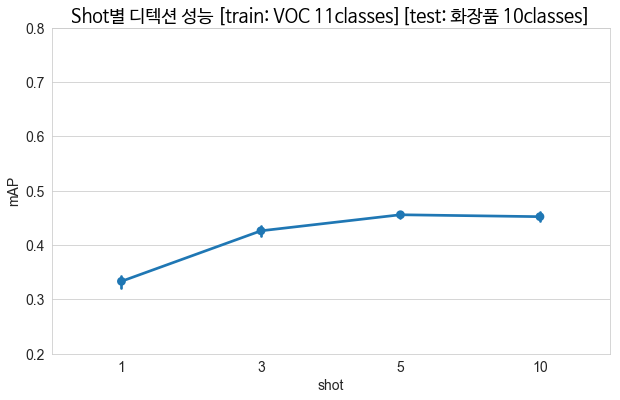

In [322]:
sns.set_style("whitegrid")
font_title = {'family': 'NanumBarunGothic', 'size': 18, 'color': 'black'}

data = res_df[res_df['model']=="heatmap-6chan-1216.pth"]
plt.subplots(figsize=(10,6))
sns.pointplot(x='shot', y='mAP', data=data)
plt.title('Shot별 디텍션 성능 [train: VOC 11classes][test: 화장품 10classes]', fontdict=font_title)
plt.ylim(0.2, 0.8)
plt.show()

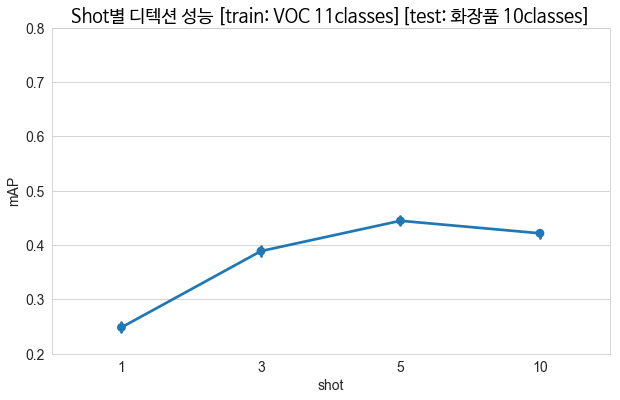

In [326]:
sns.set_style("whitegrid")
font_title = {'family': 'NanumBarunGothic', 'size': 18, 'color': 'black'}

data = res_df[res_df['model']=="heatmap-6chan-1216-fine.pth"]
plt.subplots(figsize=(10,6))
sns.pointplot(x='shot', y='mAP', data=data)
plt.title('Shot별 디텍션 성능 [train: VOC 11classes][test: 화장품 10classes]', fontdict=font_title)
plt.ylim(0.2, 0.8)
plt.show()

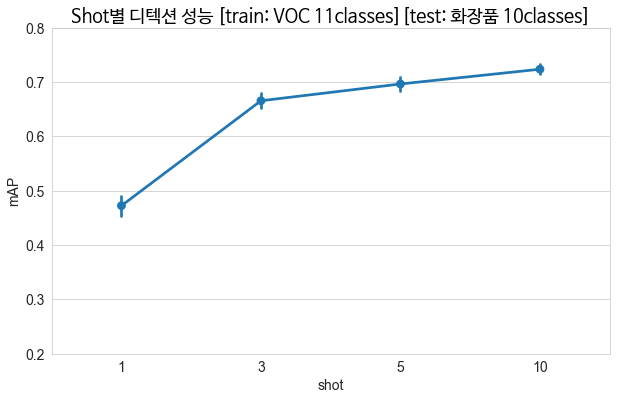

In [323]:
sns.set_style("whitegrid")
font_title = {'family': 'NanumBarunGothic', 'size': 18, 'color': 'black'}

data = res_df[res_df['model']=="heatmap-6chan-1218-21.pth"]
plt.subplots(figsize=(10,6))
sns.pointplot(x='shot', y='mAP', data=data)
plt.title('Shot별 디텍션 성능 [train: VOC 11classes][test: 화장품 10classes]', fontdict=font_title)
plt.ylim(0.2, 0.8)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


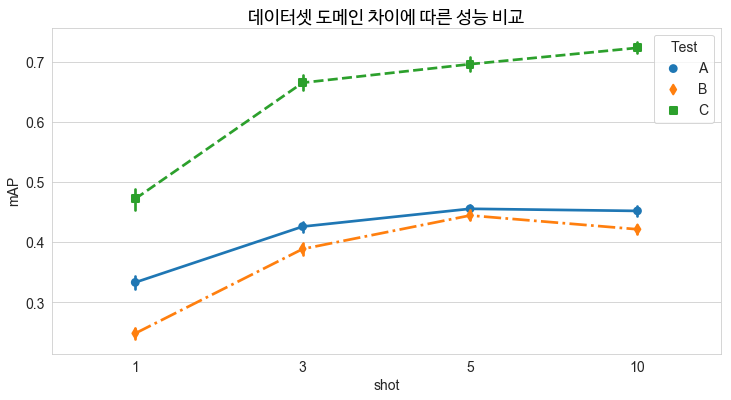

In [347]:
sns.set_style("whitegrid")
font_title = {'family': 'NanumBarunGothic', 'size': 18, 'color': 'black'}

data = res_df[(res_df['model']=="heatmap-6chan-1216.pth") | (res_df['model']=="heatmap-6chan-1216-fine.pth") | (res_df['model']=="heatmap-6chan-1218-21.pth")]
data['Test'] = None
data.loc[data[data['model']=="heatmap-6chan-1216.pth"].index,'Test'] = 'A'
data.loc[data[data['model']=="heatmap-6chan-1216-fine.pth"].index,'Test'] = 'B'
data.loc[data[data['model']=="heatmap-6chan-1218-21.pth"].index,'Test'] = 'C'

plt.subplots(figsize=(12,6))
sns.pointplot(x='shot', y='mAP', hue='Test', data=data, 
              hue_order=['A', 'B', 'C'], markers=['o', 'd', 's'], linestyles=['-', '-.', '--'])
plt.title('데이터셋 도메인 차이에 따른 성능 비교', fontdict=font_title)
# plt.ylim(0.2, 0.8)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


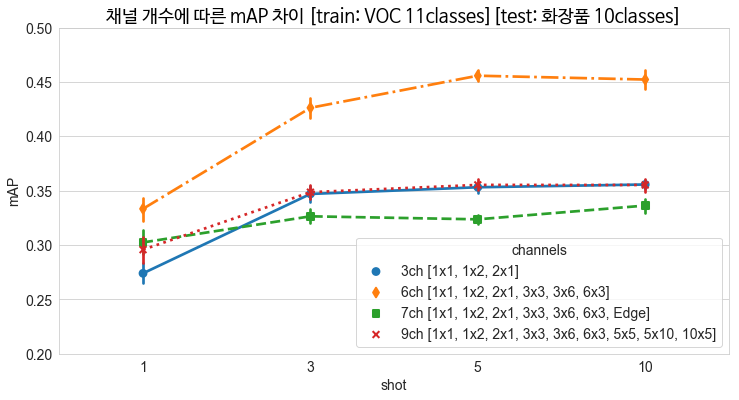

In [11]:
sns.set_style("whitegrid")
font_title = {'family': 'NanumBarunGothic', 'size': 18, 'color': 'black'}

mask = (res_df['model']=="heatmap-6chan-1216.pth") | (res_df['model']=="heatmap-3chan-1219.pth") | (res_df['model']=="heatmap-9chan-1219.pth") | (res_df['model']=="heatmap-7chan-1217.pth")
data = res_df[mask]
data['channels'] = None
data.loc[data[data['model']=="heatmap-3chan-1219.pth"].index,'channels'] = '3ch [1x1, 1x2, 2x1]'
data.loc[data[data['model']=="heatmap-6chan-1216.pth"].index,'channels'] = '6ch [1x1, 1x2, 2x1, 3x3, 3x6, 6x3]'
data.loc[data[data['model']=="heatmap-7chan-1217.pth"].index,'channels'] = '7ch [1x1, 1x2, 2x1, 3x3, 3x6, 6x3, Edge]'
data.loc[data[data['model']=="heatmap-9chan-1219.pth"].index,'channels'] = '9ch [1x1, 1x2, 2x1, 3x3, 3x6, 6x3, 5x5, 5x10, 10x5]'
plt.subplots(figsize=(12,6))
sns.pointplot(x='shot', y='mAP', hue='channels', data=data,
             hue_order=[
                 '3ch [1x1, 1x2, 2x1]',
                 '6ch [1x1, 1x2, 2x1, 3x3, 3x6, 6x3]',
                 '7ch [1x1, 1x2, 2x1, 3x3, 3x6, 6x3, Edge]',
                 '9ch [1x1, 1x2, 2x1, 3x3, 3x6, 6x3, 5x5, 5x10, 10x5]'
             ], markers=['o', 'd', 's', 'x'], linestyles=['-', '-.', '--', ':'])
plt.title('채널 개수에 따른 mAP 차이 [train: VOC 11classes][test: 화장품 10classes]', fontdict=font_title)
plt.ylim(0.2, 0.5)
plt.show()

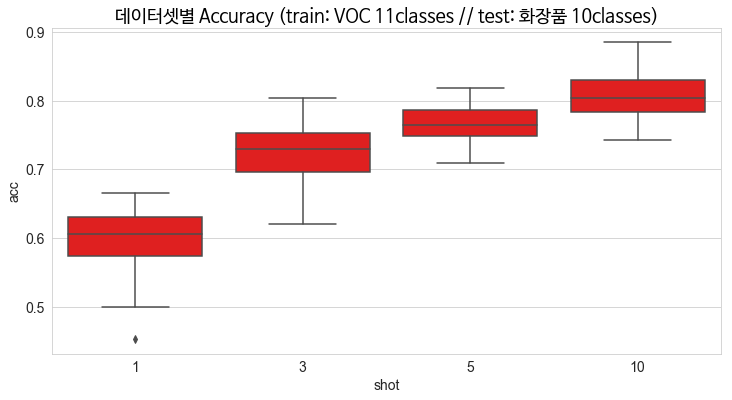

In [7]:
sns.set_style("whitegrid")
font_title = {'family': 'NanumBarunGothic', 'size': 18, 'color': 'black'}

# data = res_df[res_df['model']=="heatmap-6chan-1217-21.pth"]
data = res_df[res_df['model']=="heatmap-6chan-1216.pth"]
plt.subplots(figsize=(12,6))
sns.boxplot(x='shot', y='acc', data=data, color='r')
plt.title('데이터셋별 Accuracy (train: VOC 11classes // test: 화장품 10classes)', fontdict=font_title)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


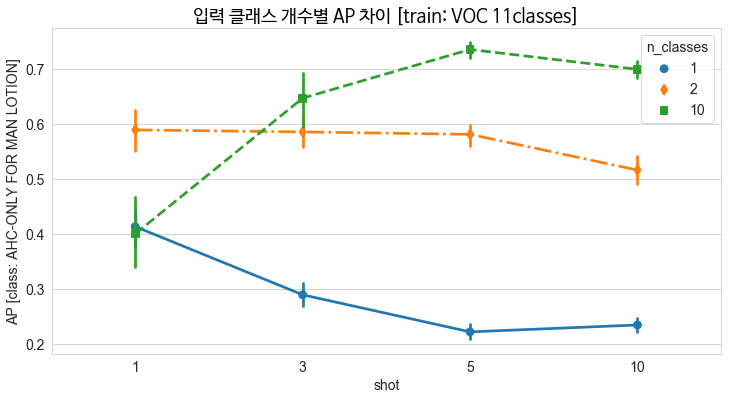

In [375]:
sns.set_style("whitegrid")
font_title = {'family': 'NanumBarunGothic', 'size': 18, 'color': 'black'}

mask = (res_df['model']=="heatmap-6chan-1216-1cls.pth") | (res_df['model']=="heatmap-6chan-1216-2cls.pth") | (res_df['model']=="heatmap-6chan-1216.pth") 
data = res_df[mask]
data['n_classes'] = None
data.loc[data[data['model']=="heatmap-6chan-1216-1cls.pth"].index,'n_classes'] = '1'
data.loc[data[data['model']=="heatmap-6chan-1216-2cls.pth"].index,'n_classes'] = '2'
data.loc[data[data['model']=="heatmap-6chan-1216.pth"].index,'n_classes'] = '10'
plt.subplots(figsize=(12,6))
sns.pointplot(x='shot', y='AP2', hue='n_classes', data=data,
             hue_order=[
                 '1',
                 '2',
                 '10',
             ], markers=['o', 'd', 's', 'x'], linestyles=['-', '-.', '--', ':'])
plt.title('입력 클래스 개수별 AP 차이 [train: VOC 11classes]', fontdict=font_title)
plt.ylabel('AP [class: AHC-ONLY FOR MAN LOTION]')
plt.show()

## mAP TABLE

In [237]:
import numpy as np
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

In [355]:
dfMapAll = pd.DataFrame()

In [356]:
savePath = 'mAP-result-log-1218.csv'
res_df = pd.read_csv(savePath)

# data = res_df[res_df['model']=="heatmap-3chan-1219.pth"]
# data = res_df[res_df['model']=="heatmap-6chan-1216.pth"]
# data = res_df[res_df['model']=="heatmap-7chan-1217.pth"]
# data = res_df[res_df['model']=="heatmap-9chan-1219.pth"]

models = ["heatmap-3chan-1219.pth", "heatmap-6chan-1216.pth", "heatmap-7chan-1217.pth", "heatmap-9chan-1219.pth"]
for m in models:
    data = res_df[res_df['model']==m]    
    cf = data.groupby('shot').apply(lambda x: mean_confidence_interval(x['mAP']))    
    
    dfMap = pd.DataFrame(np.array(list(cf)),  columns=['mean', 'cf'])
    dfMapAll = dfMapAll.append(dfMap)
dfMapAll

,mean,cf
0,0.274025,0.009646
1,0.347035,0.007395
2,0.353193,0.005331
3,0.355718,0.004476
0,0.333366,0.011844
1,0.426261,0.009536
2,0.455790,0.005924
3,0.452264,0.008757
0,0.302431,0.012332
1,0.326456,0.006663


In [357]:
dfMapAll.to_excel('temp.xlsx', index=False)